# Lecture 4: Table & Files

<h2>Outline<span class="tocSkip"></span></h2>
<hr>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#1.-Functions" data-toc-modified-id="1.-Functions-1">1. Functions</a></span></li>
    <li><span><a href="#2.-Functions-as--a-data-type" data-toc-modified-id="2.-Functions-as--a-data-type-2">2. Functions as  a data type</a></span></li>
    <li><span><a href="#3.-Arrays" data-toc-modified-id="3.-Arrays-3">3. Arrays</a></span></li>
    <li><span><a href="#4.-Files" data-toc-modified-id="4.-Files-4">4. Files</a></span></li></ul></div>

## Learning Objectives
<hr>

- Define a function and an anonymous function in Python.
- Write a docstring for a function that describes parameters, return values, behaviour and usage.
- Use NumPy to create arrays with built-in functions.
- Create arrays in Python using built-in functions or external libraries such as NumPy.
- Access array elements in an array using indexing and slicing.
- Read data from and write data to files in Python using built-in functions such as open() and close().
- Understand the different file modes such as read ('r'), write ('w'), append ('a'), and binary ('b'), and how to use them appropriately.

## 1. Functions
<hr>

A [function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) is a reusable piece of code that can accept input parameters, also known as "arguments". For example, let's define a function called `square` which takes one input parameter `n` and returns the square `n**2`:

In [1]:
def square(n):
    n_squared = n**2
    return n_squared

In [2]:
square(2)

4

In [3]:
square(100)

10000

In [4]:
square(12345)

152399025

In [31]:
def my_function(x, y):
    return x + y

In [32]:
my_function(1, 2)
result = my_function(1, 2)
result

3

Functions begin with the `def` keyword, then the function name, arguments in parentheses, and then a colon (`:`). The code executed by the function is defined by indentation. The output or "return" value of the function is specified using the `return` keyword.

In [33]:
def function_without_return(x):
    print(x)

result = function_without_return("hello!")
print(result)

hello!
None


In [34]:
def my_function2(x, y, z=1.5):
    if z > 1:
        return z * (x + y)
    else:
        return z / (x + y)

In [36]:
my_function2(5, 6, z=0.7)
my_function2(3.14, 7, 3.5)
my_function2(10, 20)

45.0

In [37]:

a = []
def func():
    for i in range(5):
        a.append(i)

In [38]:
func()
a
func()
a

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

### Side Effects & Local Variables

When you create a variable inside a function, it is local, which means that it only exists inside the function. For example:

In [5]:
def cat_string(str1, str2):
    string = str1 + str2
    return string

In [6]:
cat_string('My name is ', 'John')

'My name is John'

In [7]:
string

NameError: name 'string' is not defined

If a function changes the variables passed into it, then it is said to have **side effects**. For example:

In [8]:
def silly_sum(my_list):
    my_list.append(0)
    return sum(my_list)

In [9]:
l = [1, 2, 3, 4]
out = silly_sum(l)
out

10

The above looks like what we wanted? But wait... it changed our `l` object...

In [10]:
l

[1, 2, 3, 4, 0]

If your function has side effects like this, you must mention it in the documentation (which we'll touch on later in this chapter).

In [40]:
a = None
#! blockstart
def bind_a_variable():
    global a
    a = []
bind_a_variable()
#! blockend
print(a)

[]


In [42]:
states = ["   Alabama ", "Georgia!", "Georgia", "georgia", "FlOrIda",
          "south   carolina##", "West virginia?"]

In [43]:
import re

def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub("[!#?]", "", value)
        value = value.title()
        result.append(value)
    return result

In [44]:
import re

def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub("[!#?]", "", value)
        value = value.title()
        result.append(value)
    return result

### Null Return Type

If you do not specify a return value, the function returns `None` when it terminates:

In [11]:
def f(x):
    x + 1 # no return!
    if x == 999:
        return
print(f(0))

None


### Optional & Required Arguments

Sometimes it is convenient to have _default values_ for some arguments in a function. Because they have default values, these arguments are optional, and are hence called "optional arguments". For example:

In [12]:
def repeat_string(s, n=2):
    return s*n

In [13]:
repeat_string("mds", 2)

'mdsmds'

In [14]:
repeat_string("mds", 5)

'mdsmdsmdsmdsmds'

In [15]:
repeat_string("mds") # do not specify `n`; it is optional

'mdsmds'

### Multiple Return Values

In many programming languages, functions can only return one object. That is technically true in Python too, but there is a "workaround", which is to return a tuple.

In [16]:
def sum_and_product(x, y):
    return (x + y, x * y)

In [17]:
sum_and_product(5, 6)

(11, 30)

The parentheses can be omitted (and often are), and a `tuple` is implicitly returned as defined by the use of the comma: 

In [18]:
def sum_and_product(x, y):
    return x + y, x * y

In [19]:
sum_and_product(5, 6)

(11, 30)

It is common to immediately unpack a returned tuple into separate variables, so it really feels like the function is returning multiple values:

In [20]:
s, p = sum_and_product(5, 6)

In [21]:
s

11

In [22]:
p

30

As an aside, it is conventional in Python to use `_` for values you don't want:

In [23]:
s, _ = sum_and_product(5, 6)

In [24]:
s

11

In [25]:
_

11

## 2. Functions as  a Data Type
<hr>

In Python, functions are actually a data type:

In [26]:
def do_nothing(x):
    return x

In [27]:
type(do_nothing)

function

In [28]:
print(do_nothing)

<function do_nothing at 0x000001AF7934DEE0>


This means you can pass functions as arguments into other functions.

In [29]:
def square(y):
    return y**2

def evaluate_function_on_x_plus_1(fun, x):
    return fun(x+1)

In [30]:
evaluate_function_on_x_plus_1(square, 5)

36

So what happened above?
- `fun(x+1)` becomes `square(5+1)`
- `square(6)` becomes `36`

## 3. Arrays
<hr>

In [45]:
# Import the array module
import array

# Create an array of integers
my_array = array.array('i', [1, 2, 3, 4, 5])

# Print the array
print(my_array)   

array('i', [1, 2, 3, 4, 5])


In [46]:
# Access an element of the array by index
print(my_array[0])  

1


In [48]:
# Modify an element of the array
my_array[2] = 10
print(my_array) 

array('i', [1, 2, 10, 4, 5])


In [49]:
# Loop through the elements of the array
for element in my_array:
    print(element)

1
2
10
4
5


In this example, we first import the array module and create an array of integers using the array() function. The first argument of the function is the type of data the array will store (in this case, integers), and the second argument is the initial values of the array.

We then access an element of the array by index and modify one of the elements. We also loop through the elements of the array using a for loop.

This is just a basic example, and there are many other operations you can perform on arrays in Python.

Finding the length of an array.

In [2]:
import array

my_array = array.array('i', [1, 2, 3, 4, 5])

print(len(my_array))   # Output: 5


5


Adding elements to an array:

In [51]:
import array

my_array = array.array('i', [1, 2, 3, 4, 5])

my_array.append(6)
print(my_array)


array('i', [1, 2, 3, 4, 5, 6])


In [52]:
my_array.extend([7, 8])
print(my_array)  

array('i', [1, 2, 3, 4, 5, 6, 7, 8])


Removing elements from an array:

In [53]:
import array

my_array = array.array('i', [1, 2, 3, 4, 5])

my_array.pop()
print(my_array) 

array('i', [1, 2, 3, 4])


In [54]:
my_array.remove(2)
print(my_array)   

array('i', [1, 3, 4])


Slicing an array:

In [55]:
import array

my_array = array.array('i', [1, 2, 3, 4, 5])

print(my_array[1:3]) 

array('i', [2, 3])


Converting an array to a list:

In [56]:
import array

my_array = array.array('i', [1, 2, 3, 4, 5])

my_list = my_array.tolist()
print(my_list)   

[1, 2, 3, 4, 5]


In [9]:
my_array

array('i', [1, 2, 3, 4, 5])

In [10]:
my_array * 2

array('i', [1, 2, 3, 4, 5, 1, 2, 3, 4, 5])

In [12]:
my_array + 1

TypeError: can only append array (not "int") to array

In [13]:
sum(my_array)

15

In [15]:
import numpy as np
np.average(my_array)

3.0

In [16]:
len(my_array)

5

## 4. Files
<hr>

**To open a file, supply the name of the file stored on disk and the mode in which the file is to be opened.**

To access a file, you must first open it. 

1. When you open a file, you give the **name of the file**.
2. If the file is stored in a different directory, the **file name preceded by the directory path**. 
3. You also **specify whether the file is to be opened for reading or writing**. 

Suppose you want to **read** data from a file named input.txt, located in the same directory as the program. 

Then you use the following function call to open the file:
			
            infile = open("input.txt", "r")
			
This statement opens the file for reading (indicated by the string argument "r") and returns a file object that is associated with the file named input.txt. 

**When opening a file for reading, the file must exist or an exception occurs**. 

Later in the chapter we will explore how to detect and handle exceptions.

The file object returned by the open function must be saved in a variable. All operations for accessing a file are made via the file object.



To open a file for **writing**, you provide the name of the file as the first argument to the open function and the string "w" as the second argument:

			outfile = open("output.txt", "w")
			
If the output file already exists, it is emptied before the new data is written into it. 

If the file does not exist, an empty file is created. 

When you are done processing a file, be sure to **close** the file using the close method:
			
            infile.close()
			outfile.close()

If your program exits without closing a file that was opened for writing, some of the output may not be written to the disk file.
			
			
			
			
**Close all files when you are done processing them.**
			
After a file has been closed, it cannot be used again until it has been reopened. Attempting to do so will result in an exception.

In [5]:
infile = open("output.txt", "r")
line = infile.readline()
line

FileNotFoundError: [Errno 2] No such file or directory: 'output.txt'

In [7]:
# Opening the file with relative path
try:
    fp = open("output.txt", "r")
    print(fp.read())
    fp.close()
except FileNotFoundError:
    print("Please check the path.")

Please check the path.


In [ ]:
outfile = open("dongye_output.txt", "w")



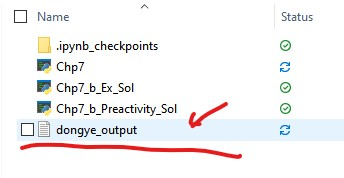

In [ ]:
outfile.close()

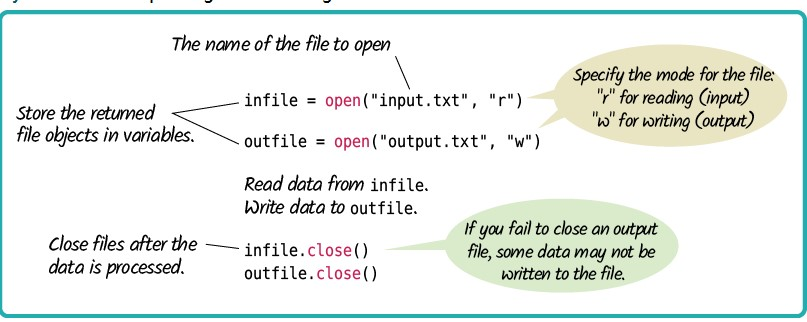

In [7]:
infile = open("dongye_output.txt", "r")

line = infile.readline()

line


'Hello, World2!\n'

In [8]:

line = infile.readline()
line

'Total: Number of entries: 2\n'

In [9]:
line = infile.readline()
line

'Total:     5.00\n'

If the file contains a blank line, then readline returns a string containing only the newline character "\n". 

In [ ]:
line = infile.readline()
line

In [ ]:
infile.close()

Reading multiple lines of text from a file is very similar to reading a sequence of values with the input function. 

You repeatedly read a line of text and process it until the sentinel value is reached:
			
            line = infile.readline()
			while line != "" :



In [12]:
infile = open("dongye_output.txt", "r")

line = infile.readline()
while line != '':
    line = infile.readline()
    line

The sentinel value is an empty string, which is returned by the readline method after the end of file has been reached.
			
As with the input function, the readline method can return only strings. 

If the file contains numerical data, the strings must be converted to the numerical value using the int or float function:
			
            value = float(line)

**Note** that the newline character at the end of the line is ignored when the string is converted to a numerical value.

**Self Check**

Write a program that carries out the following tasks:
			
            Open a file with the name hello.txt.
			Store the message “Hello, World!” in the file.
			Close the file.
			Open the same file again.
			Read the message into a string variable and print it.

In [ ]:
##
#  Write a message to a file and then read it back.
#

# Define constant variables.
MESSAGE = "Hello World!"
FILENAME = "hello.txt"

# Write the message to the file.
outf = open(FILENAME, "w")
outf.write(MESSAGE + "\n")
outf.close()

# Read the message back and display it.
inf = open(FILENAME, "r")
message = inf.readline()
print("The file contained", message)



#### *A File Processing Example**

Here is a typical example of processing data from a file. 

Suppose you are given a text file that contains a sequence of floating-point values, stored one value per line. 

You need to read the values and write them to a new output file, aligned in a column and followed by their total and average value. If the input file has the contents 
			
            32.0
			54.0
			67.5
			29.0
			35.0
			80.25
			115.0

then the output file should contain
			         
                      32.00
			          54.00
			          67.50
			          29.00
			          35.00
			          80.25
			         115.00
			       --------
			Total:   412.75
			Average:  58.96

In [ ]:
##
#  This program reads a file containing numbers and writes the numbers to 
#  another file, lined up in a column and followed by their total and average.
#

# Prompt the user for the name of the input and output files.
inputFileName = input("Input file name: ")
outputFileName = input("Output file name: ")

# Open the input and output files.
infile = open(inputFileName, "r")
outfile = open(outputFileName, "w")

# Read the input and write the output.
total = 0.0
count = 0

line = infile.readline()
while line != "" :
   value = float(line)
   outfile.write("%15.2f\n" % value)
   total = total + value
   count = count + 1
   line = infile.readline()

# Output the total and average.
outfile.write("%15s\n" % "--------")
outfile.write("Total: %8.2f\n" % total)

avg = total / count
outfile.write("Average: %6.2f\n" % avg)

# Close the files.
infile.close()
outfile.close()